In [1]:
from sklearn import svm
from sklearn import decomposition
from tensorflow.examples.tutorials.mnist import input_data
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import time


# 导入MNIST数据集
m = input_data.read_data_sets("MNIST_data/", one_hot=False)
train_data, train_label = m.train.images, m.train.labels
test_data, test_label = m.test.images, m.test.labels

Extracting MNIST_data/train-images-idx3-ubyte.gz


Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [ ]:
# 进行PCA主成分分析　降为3维
pca = decomposition.PCA(n_components=3)
new_train_data = pca.fit_transform(train_data)
new_test_data = pca.fit_transform(test_data)

train data:


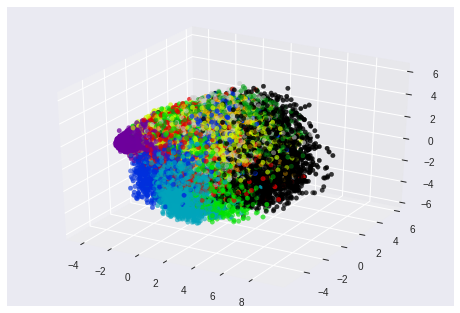

test data:


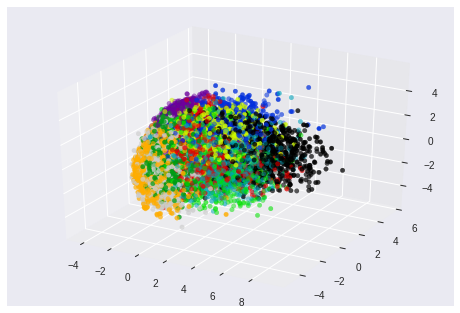

In [ ]:
# 显示训练数据
fig0 = plt.figure(0)
ax = fig0.gca(projection='3d')
ax.scatter(new_train_data[:, 0], new_train_data[:, 1], new_train_data[:, 2], c=train_label, cmap=plt.cm.spectral)
print("train data:")
plt.show()
# 显示测试数据
fig1 = plt.figure(1)
ax = fig1.gca(projection='3d')
ax.scatter(new_test_data[:, 0], new_test_data[:, 1], new_test_data[:, 2], c=test_label, cmap=plt.cm.spectral)
print("test data:")
plt.show()

In [4]:
# 调用svm进行训练
clf = svm.SVC()
print("开始训练：")
start = time.clock()
clf.set_params(kernel='rbf').fit(train_data[0:1000, :], train_label[0:1000])
# 进行测试
print("训练完成")
print("开始测试")
test_result = clf.predict(test_data[0:30, :])
print("the accuracy is %f" % np.mean(np.equal(test_result, test_label[0:30])))
print("测试完成")
end = time.clock()
print("程序运行时间为：%f" % end-start)

开始训练：


训练完成
开始测试
the accuracy is 0.900000
测试完成


TypeError: unsupported operand type(s) for -: 'str' and 'float'